In [7]:
import torch
from autoencoders.VQ_VAE.VQ_VAE import VQ_VAE2, VQ_VAE
from prior_models.pixel_snail import PixelSNAIL
from sample import sample_pixelSNAIL
from yaml import safe_load

In [8]:
#build and load top model
config = safe_load(open("configs_pixelsnail/default_top.yaml"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_t = PixelSNAIL(
    [32, 32],
    512,
    config['channel'],
    5,
    4,
    config['n_res_block'],
    config['n_res_channel'],
    dropout=config['dropout'],
    n_out_res_block=config['n_out_res_block']
)
model_t.load_state_dict(torch.load("./resutls_pixelsnail/best_model_top.pth"))
model_t = model_t.to(device)
model_t.eval()

#build and load bottom model
config = safe_load(open("configs_pixelsnail/default_bottom.yaml"))
model_b = PixelSNAIL(
    [64, 64],
    512,
    config['channel'],
    5,
    4,
    config['n_res_block'],
    config['n_res_channel'],
    dropout=config['dropout'],
    n_out_res_block=config['n_out_res_block'],
    n_cond_res_block=config['n_cond_res_block'],
    cond_res_channel=config['n_res_channel'],
    attention=False
)
model_b.load_state_dict(torch.load("./resutls_pixelsnail/best_model_bottom.pth"))
model_b = model_b.to(device)
model_b.eval()

c:\Users\Zihan liu\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


PixelSNAIL(
  (horizontal): CausalConv2d(
    (pad): ZeroPad2d((2, 2, 1, 0))
    (conv): WNConv2d(
      (conv): Conv2d(512, 256, kernel_size=(2, 5), stride=(1, 1))
    )
  )
  (vertical): CausalConv2d(
    (pad): ZeroPad2d((1, 0, 2, 0))
    (conv): WNConv2d(
      (conv): Conv2d(512, 256, kernel_size=(3, 2), stride=(1, 1))
    )
  )
  (blocks): ModuleList(
    (0-3): 4 x PixelBlock(
      (resblocks): ModuleList(
        (0-4): 5 x GatedResBlock(
          (activation): ELU(alpha=1.0)
          (conv1): CausalConv2d(
            (pad): ZeroPad2d((2, 2, 4, 0))
            (conv): WNConv2d(
              (conv): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1))
            )
          )
          (dropout): Dropout(p=0.15, inplace=False)
          (conv2): CausalConv2d(
            (pad): ZeroPad2d((2, 2, 4, 0))
            (conv): WNConv2d(
              (conv): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1))
            )
          )
          (condition): WNConv2d(
            

In [9]:
config = safe_load(open("./configs/default_v2_exp15.yaml"))
vqvae_config = config['VQ-VAE']
if 'version' in vqvae_config.keys() and vqvae_config['version'] == 2:
    vqvae = VQ_VAE2(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
else:
    vqvae_config['version'] = 1
    vqvae = VQ_VAE(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vqvae_config['device'] = device
checkpoint = torch.load('./results/best_model.pth')
vqvae.load_state_dict(checkpoint)
_ = vqvae.to(device)

In [10]:
images = []
for i in range(5):
    sampled_top = sample_pixelSNAIL(model_t, device, 2, [32,32], 1.0, condition=None)
    sampled_bottom = sample_pixelSNAIL(model_b, device, 2, [64,64], 1.0, condition=sampled_top)
    images.extend(vqvae.decode_from_id(sampled_bottom, sampled_top).to('cpu').detach().numpy())

100%|██████████| 64/64 [01:21<00:00,  1.27s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


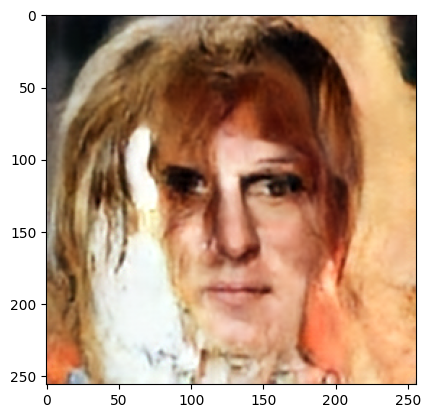

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


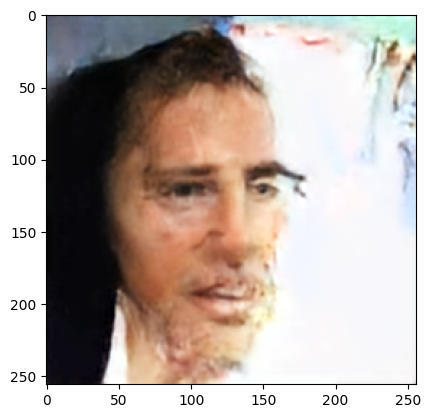

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


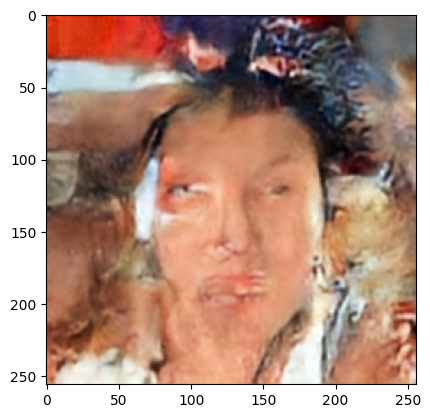

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


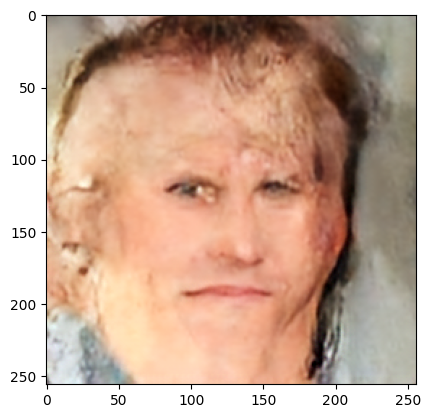

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


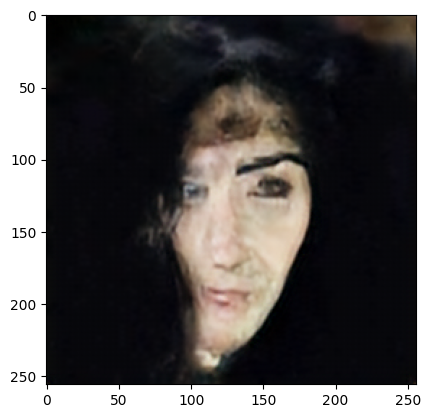

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


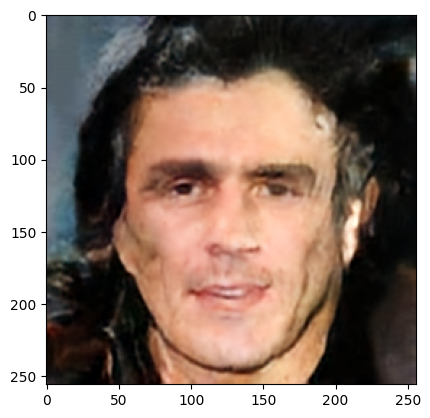

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


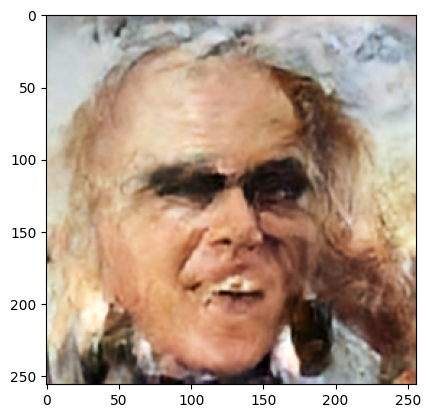

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


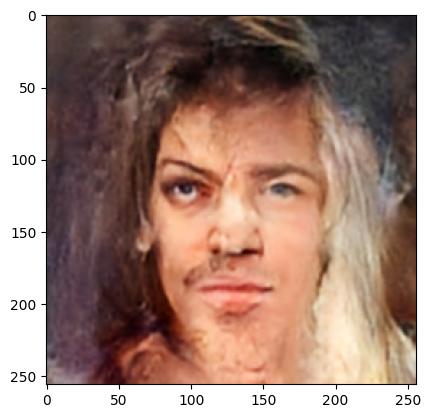

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


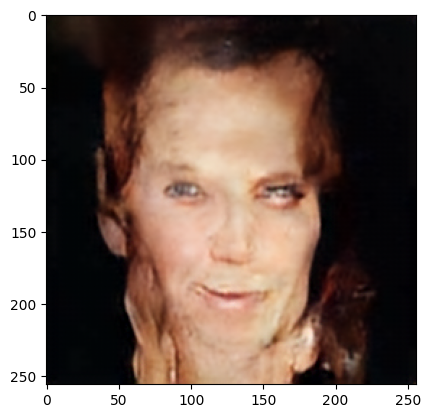

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


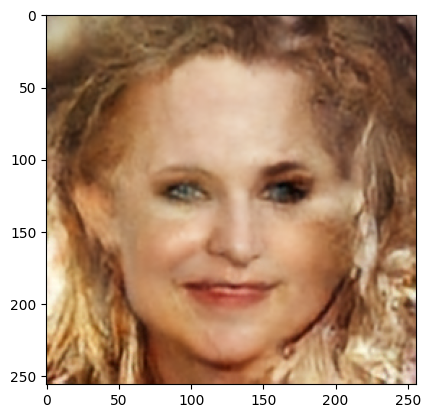

In [11]:
from matplotlib import pyplot as plt
import numpy as np
def map_to_correct_coordinates(image):
    return (image + 1) / 2

for img in images:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

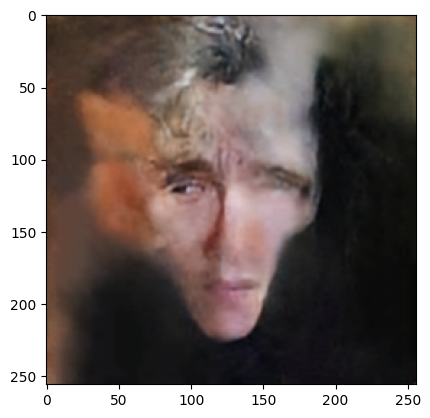

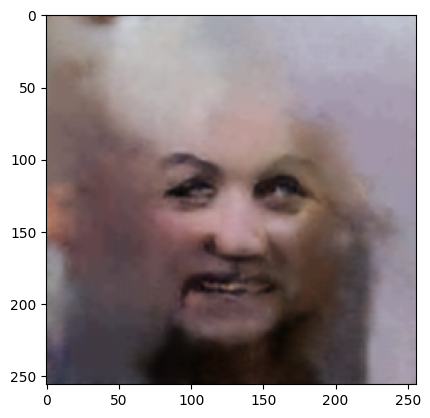

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


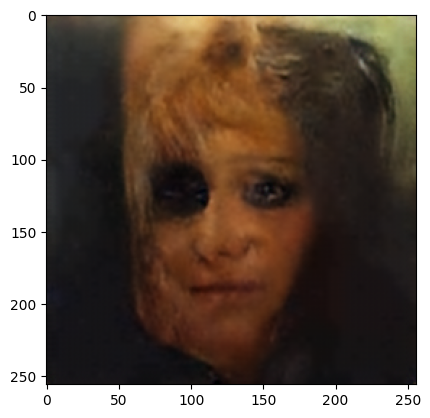

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


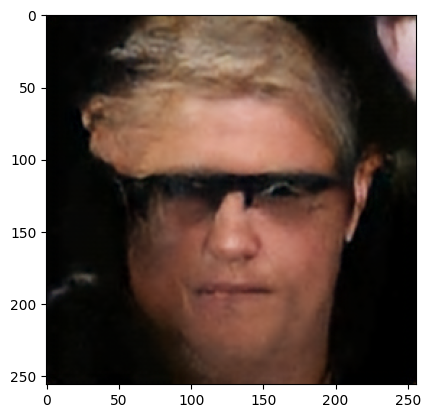

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


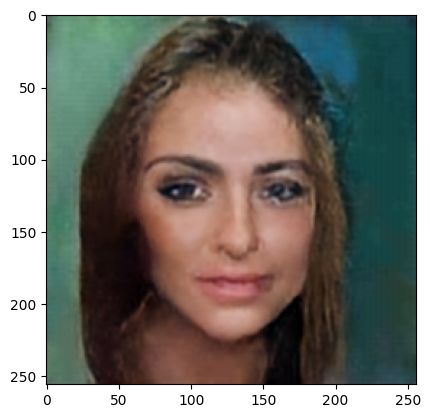

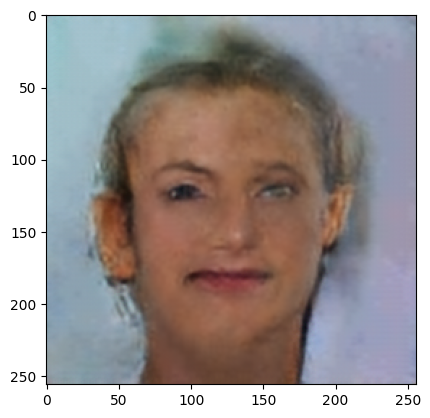

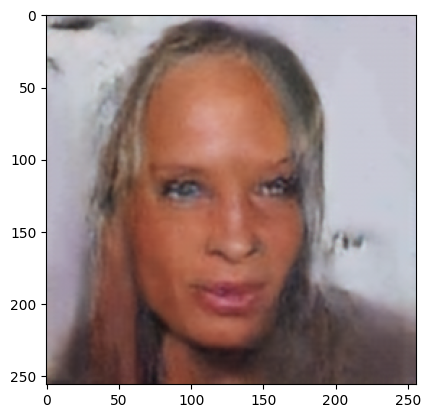

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


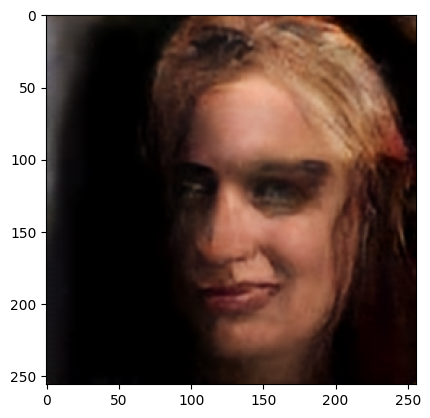

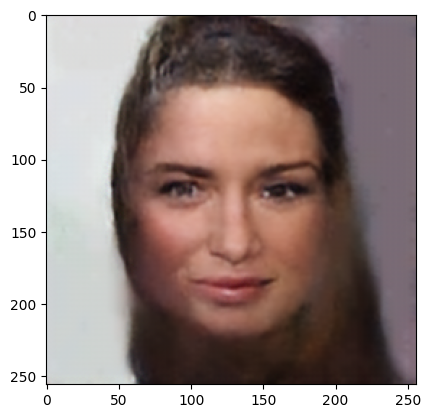

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


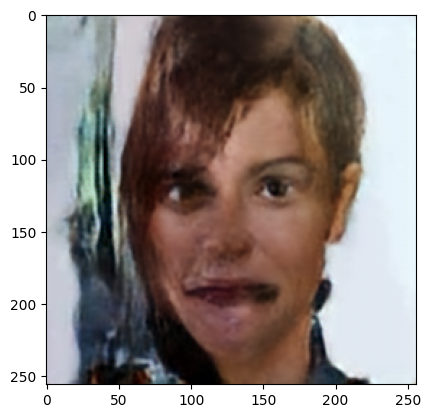

In [7]:
from matplotlib import pyplot as plt
import numpy as np
def map_to_correct_coordinates(image):
    return (image + 1) / 2

for img in images:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


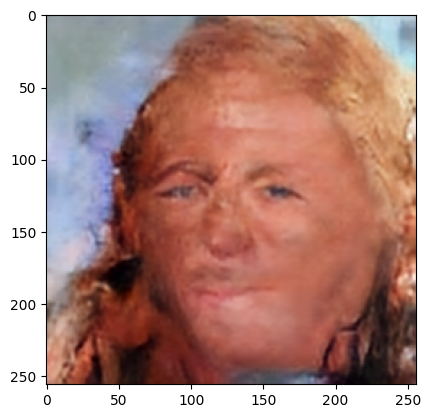

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


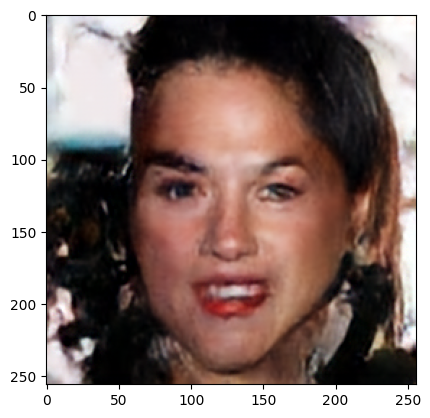

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


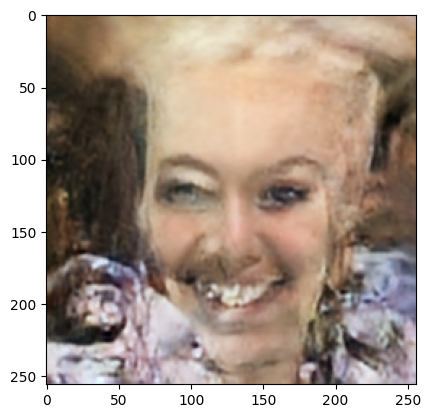

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


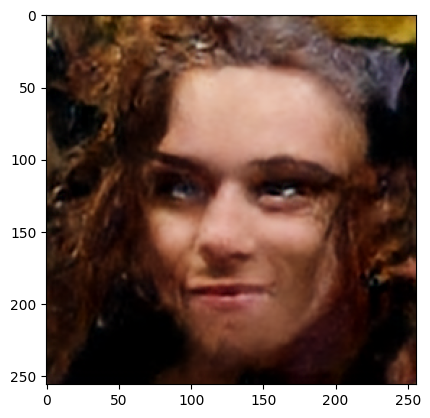

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


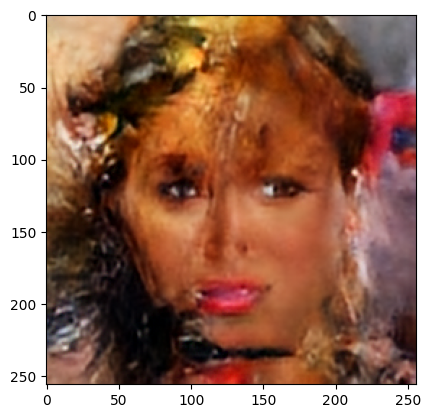

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


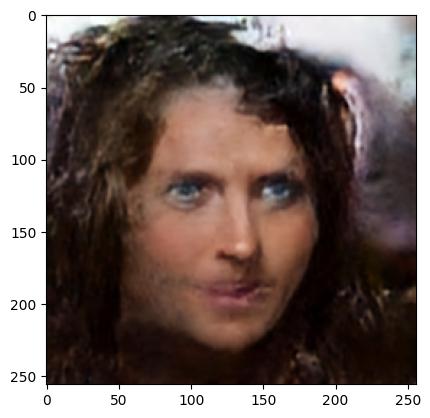

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


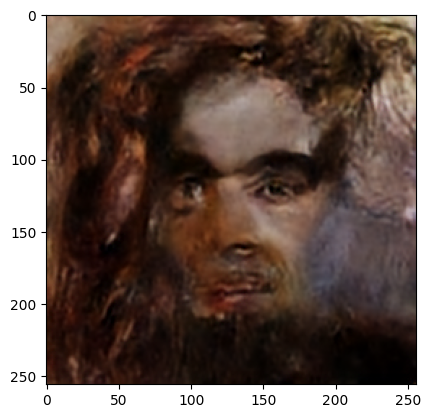

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


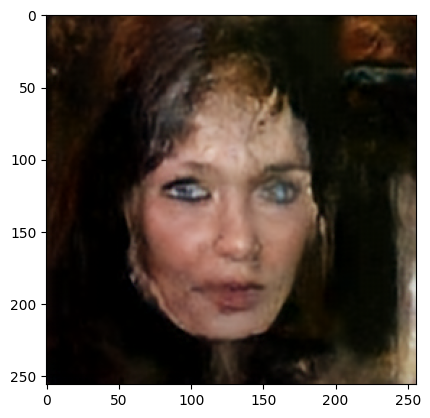

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


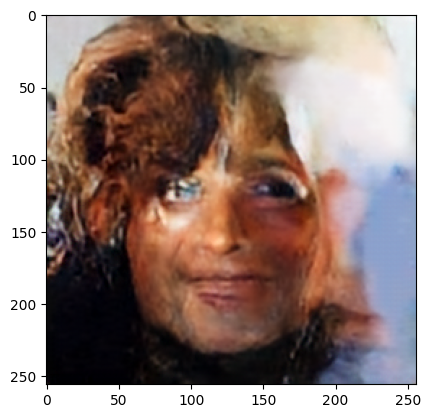

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


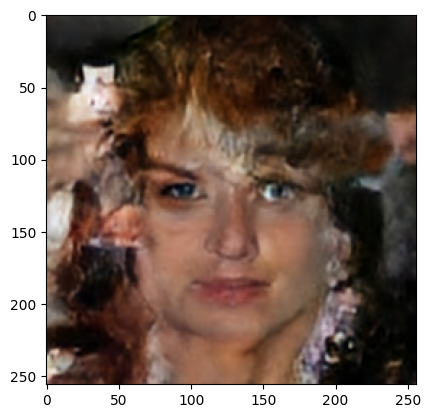

In [5]:
from matplotlib import pyplot as plt
import numpy as np
def map_to_correct_coordinates(image):
    return (image + 1) / 2

for img in images:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()